In [22]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing

In [14]:
df=pd.read_csv('C:/Users/sanji/pes/sem5/da/project/NFLX.csv')
print(df.shape)
print(df.columns)
print(df.head())


(5044, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
         Date      Open      High       Low     Close  Adj Close     Volume
0  2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2  2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3  2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200


There are 5044 rows and 7 columns that are Date, Open, High, Low, Close, Adj Close, Volume

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


There are no NULL values in any of the columns. The datatype of data is object and can be changed to the datatime datatype for easier extraction of year,month and date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5044 non-null   datetime64[ns]
 1   Open       5044 non-null   float64       
 2   High       5044 non-null   float64       
 3   Low        5044 non-null   float64       
 4   Close      5044 non-null   float64       
 5   Adj Close  5044 non-null   float64       
 6   Volume     5044 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 276.0 KB


In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802857,25.802857,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


The mean is greater than median in all columns so it is right skewed(positive)
We can see that the range of the columns is also very high as min and max values are very far apart
The standard deviation is also very high for all the columns which means it has a high spread 
It can also be noticed that all columns except Date and Volume have nearly same range and spread

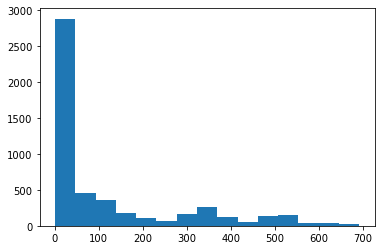

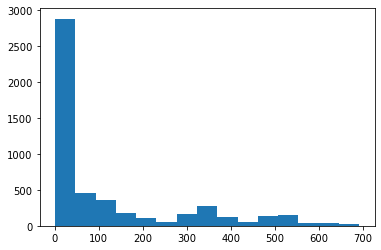

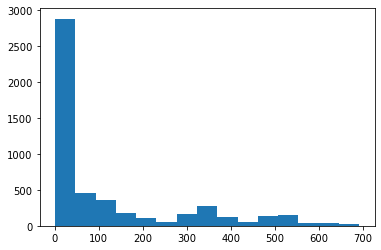

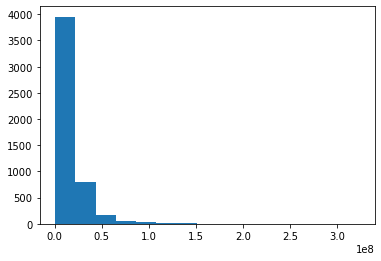

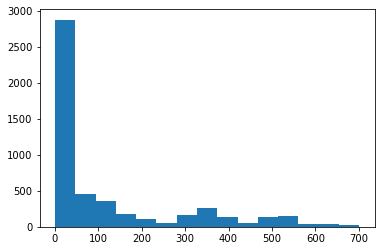

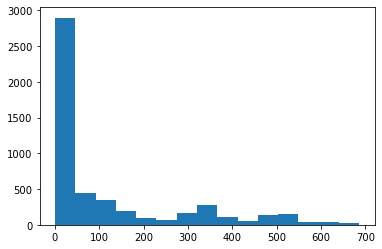

In [17]:
plt.hist(df['Open'],15)
plt.show()
plt.hist(df['Close'],15)
plt.show()
plt.hist(df['Adj Close'],15)
plt.show()
plt.hist(df['Volume'],15)
plt.show()
plt.hist(df['High'],15)
plt.show()
plt.hist(df['Low'],15)
plt.show()

It can be noticed from the histograms that all the columns are right skewed

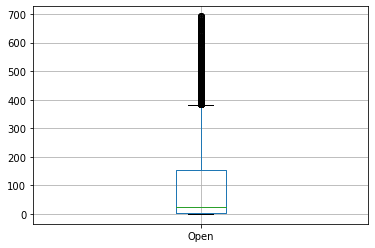

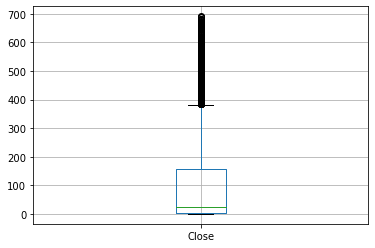

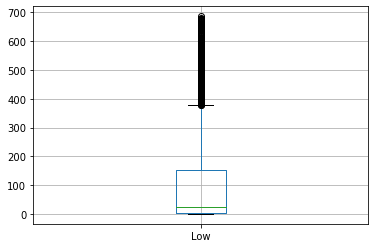

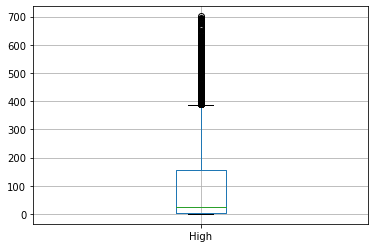

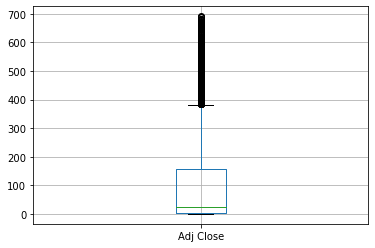

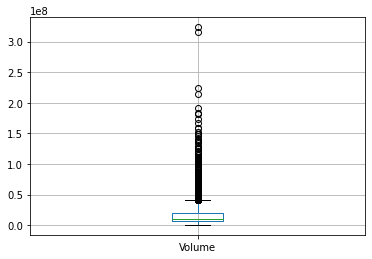

In [18]:
df['Open'].plot.box(grid='True')
plt.show()
df['Close'].plot.box(grid='True')
plt.show()
df['Low'].plot.box(grid='True')
plt.show()
df['High'].plot.box(grid='True')
plt.show()
df['Adj Close'].plot.box(grid='True')
plt.show()
df['Volume'].plot.box(grid='True')

In [19]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers
def res(out):
    print("number of outliers:"+ str(len(outliers)))
    print("max outlier value: "+ str(outliers.max()))
    print("min outlier value: "+ str(outliers.min()))
    print()
print("Open")
outliers = find_outliers_IQR(df['Open'])
res(outliers)
print("Close")
outliers = find_outliers_IQR(df['Close'])
res(outliers)
print("High")
outliers = find_outliers_IQR(df['High'])
res(outliers)
print("Low")
outliers = find_outliers_IQR(df['Low'])
res(outliers)
print("Adj Close")
outliers = find_outliers_IQR(df['Adj Close'])
res(outliers)
print("Volume")
outliers = find_outliers_IQR(df['Volume'])
res(outliers)


Open
number of outliers:502
max outlier value: 692.349976
min outlier value: 383.589996

Close
number of outliers:501
max outlier value: 691.6900019999999
min outlier value: 383.790009

High
number of outliers:504
max outlier value: 700.98999
min outlier value: 389.22000099999997

Low
number of outliers:491
max outlier value: 686.090027
min outlier value: 379.190002

Adj Close
number of outliers:501
max outlier value: 691.6900019999999
min outlier value: 383.790009

Volume
number of outliers:336
max outlier value: 323414000
min outlier value: 40432000



As we can see from both boxplot and the statistical formula, each column has a large number of outliers. Considering this is a 
stock prediction dataset, the outliers are significantly important
to the dataset and shouldn't be dropped or replaced


In [1]:
temp_df=df.loc[:, df.columns!='Date']
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

NameError: name 'df' is not defined

In [25]:
df_normalised = temp_df.copy()
# apply normalization techniques
for column in df_normalised.columns:
    df_normalised[column] = df_normalised[column]/df_normalised[column].abs().max()
display(df_normalised)

,Open,High,Low,Close,Adj Close,Volume
0,0.001670,0.001773,0.001670,0.001730,0.001730,0.324012
1,0.001754,0.001748,0.001745,0.001749,0.001749,0.034336
2,0.001753,0.001758,0.001687,0.001673,0.001673,0.020436
3,0.001682,0.001661,0.001582,0.001595,0.001595,0.020895
4,0.001600,0.001580,0.001562,0.001549,0.001549,0.031397
...,...,...,...,...,...,...
5039,0.279035,0.278535,0.277471,0.282193,0.282193,0.026548
5040,0.283354,0.285239,0.278098,0.285446,0.285446,0.035244
5041,0.286994,0.289220,0.279351,0.278897,0.278897,0.026023
5042,0.277345,0.293114,0.279439,0.296506,0.296506,0.029755
